In [1]:
import os
import sys
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import matplotlib.ticker as ticker

import time
import matplotlib.dates as md
import dateutil
from tqdm import tqdm

from pandas import DataFrame
import random

%matplotlib inline

In [2]:
data = pd.read_csv("ANL-ALCF-DJC-MIRA_20150101_20151231.csv")
total_jobs = len(data['LOCATION'])

exit_code_dic = {}

for i in range(0,total_jobs):
    exit_code = int(data["EXIT_CODE"][i])
    count = exit_code_dic.get(exit_code, 0)
    exit_code_dic[exit_code] = count + 1

print(exit_code_dic)
print(exit_code_dic[0], total_jobs, np.float64(exit_code_dic[0])/total_jobs)

{0: 61442, 143: 13936, 139: 1067, 1: 3934, 255: 537, 72: 37, 251: 9, 164: 47, 134: 947, 137: 72, 138: 2, -1: 56, 133: 23, 2: 66, 204: 3, 44: 173, 254: 10, 4: 21, 132: 144, 76: 50, 1234567: 45, 126: 24, 228: 19, 249: 11, 36: 20, 68: 10, 192: 1, 127: 24, 100: 10, 163: 21, 136: 1, 226: 1, 25: 4, 108: 1, 236: 3, 140: 2, 101: 4, 196: 26, 34: 1, 225: 2, 32: 5, 3: 1, 128: 7, 135: 1, 247: 2, 120: 3, 224: 14, 96: 8, 123: 2, 160: 1, 180: 1, 20: 3, 172: 3, 8: 1}
61442 82858 0.7415337082719834


In [16]:
exit_code_dic_ratio = []

for i in exit_code_dic:
    exit_code_dic_ratio.append((i, exit_code_dic[i], np.float64(exit_code_dic[i])*100/total_jobs))
new_exit_code_dic_ratio = sorted(exit_code_dic_ratio, key=lambda time: time[1], reverse=True)
    
    
for i in range(0,len(new_exit_code_dic_ratio)):
    print(f"exit code: {new_exit_code_dic_ratio[i][0]}, counts: {new_exit_code_dic_ratio[i][1]}, ratio: {new_exit_code_dic_ratio[i][2]}%")

exit code: 0, counts: 61442, ratio: 74.15337082719834%
exit code: 143, counts: 13936, ratio: 16.81913635376186%
exit code: 1, counts: 3934, ratio: 4.747881918462912%
exit code: 139, counts: 1067, ratio: 1.28774529918656%
exit code: 134, counts: 947, ratio: 1.142919211180574%
exit code: 255, counts: 537, ratio: 0.648096743826788%
exit code: 44, counts: 173, ratio: 0.20879094354196337%
exit code: 132, counts: 144, ratio: 0.17379130560718337%
exit code: 137, counts: 72, ratio: 0.08689565280359168%
exit code: 2, counts: 66, ratio: 0.07965434840329239%
exit code: -1, counts: 56, ratio: 0.06758550773612687%
exit code: 76, counts: 50, ratio: 0.06034420333582756%
exit code: 164, counts: 47, ratio: 0.0567235511356779%
exit code: 1234567, counts: 45, ratio: 0.0543097830022448%
exit code: 72, counts: 37, ratio: 0.044654710468512396%
exit code: 196, counts: 26, ratio: 0.031378985734630334%
exit code: 126, counts: 24, ratio: 0.02896521760119723%
exit code: 127, counts: 24, ratio: 0.0289652176011972

In [39]:
wait_time_list = []
largest_time = 0

for i in range(0,total_jobs):
    start_time = md.date2num(dateutil.parser.parse(data['QUEUED_TIMESTAMP'][i]))
    end_time = md.date2num(dateutil.parser.parse(data['START_TIMESTAMP'][i]))
    wait_time = end_time - start_time
    wait_time_list.append(wait_time)
    if largest_time < wait_time:
        largest_time = wait_time
print(largest_time)

167.29268518518802


[0.0, 17.5, 35.0, 52.5, 70.0, 87.5, 105.0, 122.5, 140.0, 157.5, 175.0]
[0.0, 17.5, 35.0, 52.5, 70.0, 87.5, 105.0, 122.5, 140.0, 157.5, 175.0]


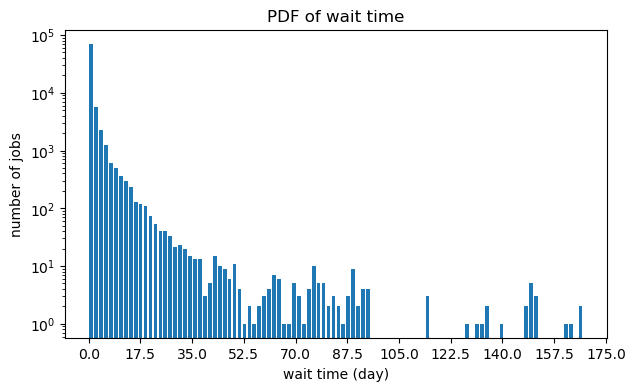

In [66]:
fig, ax = plt.subplots(figsize=(7, 4))
plt.hist(wait_time_list,100,log=True, rwidth = 0.75)

# x_tick_list = range(0,175,12.5)
total_x_ticks = 10
x_tick_list = [175/total_x_ticks*i for i in range(0,total_x_ticks+1)]
# print(x_tick_list)
time_list = [time.total_seconds()/(3600*24) for time in md.num2timedelta(x_tick_list)]
# print(time_list)
plt.xticks(x_tick_list,time_list)
# xfmt = md.DateFormatter('%d %H:%M')
# ax.xaxis.set_major_formatter(xfmt)
plt.ylabel("number of jobs")
plt.xlabel("wait time (days)")
plt.title("PDF of wait time")
plt.savefig(f"fig/wait_time_pdf.png",bbox_inches = 'tight')
plt.show()

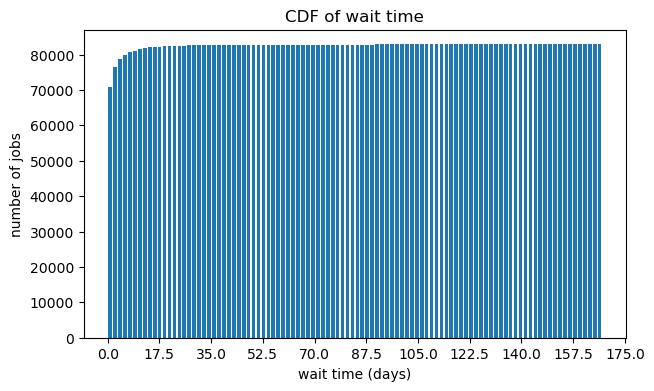

In [68]:
fig, ax = plt.subplots(figsize=(7, 4))
plt.hist(wait_time_list,100, rwidth = 0.75, cumulative=True)
total_x_ticks = 10
x_tick_list = [175/total_x_ticks*i for i in range(0,total_x_ticks+1)]
# print(x_tick_list)
time_list = [time.total_seconds()/(3600*24) for time in md.num2timedelta(x_tick_list)]
# print(time_list)
plt.xticks(x_tick_list,time_list)
plt.ylabel("number of jobs")
plt.xlabel("wait time (days)")
plt.title("CDF of wait time")
plt.savefig(f"fig/wait_time_cdf.png",bbox_inches = 'tight')
plt.show()